# Network Analysis with Python

From online social networks such as Facebook and Twitter to transportation networks such as bike sharing systems, networks are everywhere—and knowing how to analyze them will open up a new world of possibilities for you as a data scientist. This notebook will equip you with the skills to analyze, visualize, and make sense of networks. You'll apply the concepts you learn to real-world network data using the powerful NetworkX library.

## What is a network?

Let's think again about examples of networks. Which of the following data is least easily modeled as a network?

- Airplane transportation.
- Phone numbers in a telephone directory. (correct)
- Co-authorship of papers.
- Atoms in a molecule.

Compared to the other options, it would not be as easy to model phone numbers in a telephone directory as a network.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import networkx as nx

path = 'data/dc23/'

## Basics of NetworkX API, using Twitter network

To get you up and running with the `NetworkX` API, we will run through some basic functions that let you query a `Twitter` network that has been pre-loaded for you and is available as `T`. The Twitter network comes from KONECT, and shows a snapshot of a subset of Twitter users. It is an anonymized Twitter network with metadata.

You're now going to use the `NetworkX` API to explore some basic properties of the network, and are encouraged to experiment with the data.

Wait for the IPython shell to indicate that the graph that has been preloaded under the variable name T (representing a Twitter network), and then answer the following question:

What is the size of the graph `T`, the type of `T.nodes()`, and the data structure of the third element of the last edge listed in `T.edges(data=True)`? The `len()` and `type()` functions will be useful here. To access the last entry of `T.edges(data=True)`, you can use `list(T.edges(data=True))[-1]`.

In [14]:
G = nx.Graph()

In [15]:
G.add_nodes_from([1, 2, 3])

In [16]:
G.nodes()

NodeView((1, 2, 3))

In [21]:
len(G.nodes)

3

In [22]:
list(G.nodes())[:2]

[1, 2]

In [17]:
G.add_edge(1, 2)

In [18]:
G.edges()

EdgeView([(1, 2)])

In [19]:
G.node[1]['label'] = 'blue'
G.nodes(data=True) 

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

/Users/ksatola/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


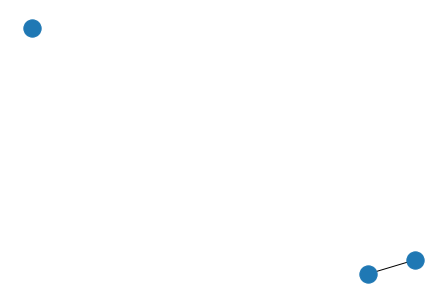

In [20]:
nx.draw(G)
plt.show();

In [26]:
nx.write_gpickle(G, path+'G.p')

In [27]:
G1 = nx.read_gpickle(path+'G.p')

In [28]:
G1.nodes()

NodeView((1, 2, 3))

## Queries on a graph

Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for `"nodes of interest"` and `"edges of interest"`. To achieve this, you'll make use of the `.nodes()` and `.edges()` methods. The `.nodes()` method returns a list of nodes, while the `.edges()` method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. Recall that passing in the keyword argument `data=True` in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

You'll write list comprehensions to effectively build these queries in one line. Here's the recipe for a list comprehension: `[ output expression for iterator variable in iterable if predicate expression ]`.

You have to fill in the `_iterable_` and the `_predicate expression_`.

- Use a list comprehension to get a list of nodes from the graph `T` that have the 'occupation' label of 'scientist'. The output expression `n` has been specified for you, along with the iterator variables `n` and `d`. Your task is to fill in the iterable and the conditional expression. Use the `.nodes()` method of `T` access its nodes, and be sure to specify `data=True` to obtain the metadata for the nodes. The iterator variable `d` is a dictionary. The key of interest here is 'occupation' and value of interest is 'scientist'.

In [64]:
T = nx.read_gpickle(path+'ego-twitter.p')

In [65]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']
noi[:10]

[5, 9, 13, 15, 17, 19, 20, 22, 23, 27]

- Use a list comprehension to get a list of edges from the graph `T` that were formed for at least 6 years, i.e., from before 1 Jan 2010. Your task once again is to fill in the iterable and conditional expression. Use the `.edges()` method of `T` to access its edges. Be sure to obtain the metadata for the edges as well. The dates are stored as `datetime.date` objects in the metadata dictionary d, under the key 'date'. To access the date 1 Jan 2009, for example, the dictionary value would be date(2009, 1, 1).

In [66]:
import datetime as dt

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < dt.date(2010, 1, 1)]
eoi[:10]

[(1, 5),
 (1, 9),
 (1, 13),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 24),
 (1, 27)]

## Types of Graphs

<img src="images/graphs01.png" alt="" style="width: 400px;"/>

<img src="images/graphs02.png" alt="" style="width: 400px;"/>

<img src="images/graphs03.png" alt="" style="width: 400px;"/>


In [67]:
# Undirected Graph
G = nx.Graph()
type(G)

networkx.classes.graph.Graph

In [68]:
# Directed Graph
G = nx.DiGraph()
type(G)

networkx.classes.digraph.DiGraph

In [69]:
# Multi Graph
G = nx.MultiGraph()
type(G)

networkx.classes.multigraph.MultiGraph

In [70]:
# Multi Directed Graph
G = nx.MultiDiGraph()
type(G)

networkx.classes.multidigraph.MultiDiGraph

## Checking the un/directed status of a graph

Which type of graph do you think the Twitter network data you have been working with corresponds to? Use Python's built-in type() function in the IPython Shell to find out. The network, as before, has been pre-loaded as T.

Of the four below choices below, which one corresponds to the type of graph that T is?

In [71]:
type(T)

networkx.classes.digraph.DiGraph

## Specifying a weight on edges

`Weights can be added to edges in a graph`, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the `'weight'` key in the metadata dictionary.

Before attempting the exercise, use the IPython Shell to access the dictionary metadata of T and explore it, for instance by running the commands `T.edges[1, 10]` and then `T.edges[10, 1]`. Note how there's only one field, and now you're going to add another field, called `'weight'`.

In [72]:
T.edges[1, 10]

{'date': datetime.date(2012, 9, 8)}

In [73]:
# There is no edge between nodes 10 and 1
T.edges[10, 1]

KeyError: 1

- Set the 'weight' attribute of the edge between node 1 and 10 of T to be equal to 2. Refer to the following template to set an attribute of an edge: `network_name.edges[node1, node2]['attribute'] = value`. Here, the 'attribute' is 'weight'.
- Set the weight of every edge involving node 293 to be equal to 1.1. To do this:
    - Using a for loop, iterate over all the edges of T, including the metadata.
    - If 293 is involved in the list of nodes `[u, v]`:
        - Set the weight of the edge between `u` and `v` to be 1.1.

In [76]:
# Set the weight of the edge between nodes 1 and 10
T[1][10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):
    
    # Check if node 3 is involved
    if 3 in [u, v]:

        # Set the weight to 1.1
        T[u][v]['weight'] = 1.1
        
    # Print only a subset
    if u < 15 and v < 15: 
        print('edge between {} and {} with labels {}'.format(u, v, d))

edge between 1 and 3 with labels {'date': datetime.date(2012, 11, 16), 'weight': 1.1}
edge between 1 and 4 with labels {'date': datetime.date(2013, 6, 7)}
edge between 1 and 5 with labels {'date': datetime.date(2009, 7, 27)}
edge between 1 and 6 with labels {'date': datetime.date(2014, 12, 18)}
edge between 1 and 7 with labels {'date': datetime.date(2010, 10, 18)}
edge between 1 and 8 with labels {'date': datetime.date(2012, 4, 18)}
edge between 1 and 9 with labels {'date': datetime.date(2007, 10, 14)}
edge between 1 and 10 with labels {'date': datetime.date(2012, 9, 8), 'weight': 2}
edge between 1 and 11 with labels {'date': datetime.date(2010, 1, 6)}
edge between 1 and 12 with labels {'date': datetime.date(2012, 12, 27)}
edge between 1 and 13 with labels {'date': datetime.date(2008, 12, 18)}
edge between 1 and 14 with labels {'date': datetime.date(2014, 5, 25)}


## Checking whether there are self-loops in the graph

`NetworkX` also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: `.number_of_selfloops()`.

In this exercise as well as later ones, you'll find the **assert statement** useful. An assertions check whether the statement placed after it evaluates to True, otherwise it will throw an `AssertionError`.

To begin, use the `.number_of_selfloops()` method on `T ` to get the number of edges that begin and end on the same node. A number of self-loops have been synthetically added to the graph. Your job in this exercise is to write a function that returns these edges.

In [77]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

In [79]:
len(find_selfloop_nodes(T))

42

There are 42 nodes in T that have self-loops.

## Network Visualization

<img src="images/graphs04.png" alt="" style="width: 400px;"/>

<img src="images/graphs05.png" alt="" style="width: 400px;"/>

<img src="images/graphs06.png" alt="" style="width: 400px;"/>

<img src="images/graphs07.png" alt="" style="width: 400px;"/>


## Visualizing using Matrix plots

It is time to try your first "fancy" graph visualization method: a **matrix plot**. To do this, `nxviz` provides a `MatrixPlot` object.

`nxviz` is a package for visualizing graphs in a rational fashion. Under the hood, the `MatrixPlot` utilizes `nx.to_numpy_matrix(G)`, which returns the matrix form of the graph. Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the weight metadata is preserved; all other metadata is lost, as you'll verify using an assert statement.

A corresponding `nx.from_numpy_matrix(A)` allows one to quickly create a graph from a NumPy matrix. The default graph type is `Graph()`; if you want to make it a `DiGraph()`, that has to be specified using the `create_using` keyword argument, e.g. (`nx.from_numpy_matrix(A, create_using=nx.DiGraph)`).

One final note, matplotlib.pyplot and networkx have already been imported as plt and nx, respectively, and the graph T has been pre-loaded. For simplicity and speed, we have sub-sampled only 100 edges from the network.

In [85]:
selected_nodes = [n for n,v in T.nodes(data=True) if n <= 101] 
len(selected_nodes)

100

In [86]:
T100 = T.subgraph(selected_nodes).copy()

In [94]:
# conda woekd, pip returned an error
#! pip install nxviz
#! conda install -c conda-forge nxviz

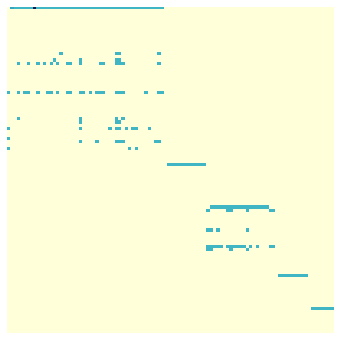

In [110]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T100)

# Draw m to the screen
m.draw()

# Display the plot
plt.show();

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T100)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

## Visualizing using Circos plots

**Circos plots** are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

In this exercise, you'll continue getting practice with the `nxviz` API, this time with the `CircosPlot` object. matplotlib.pyplot has been imported for you as plt.

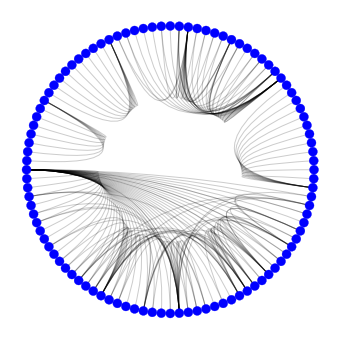

In [95]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T100)

# Draw c to the screen
c.draw()

# Display the plot
plt.show();

## Visualizing using Arc plots

Following on what you've learned about the `nxviz` API, now try making an `ArcPlot` of the network. Two keyword arguments that you will try here are `node_order='keyX'` and `node_color='keyX'`, in which you specify a key in the node metadata dictionary to color and order the nodes by.

In [102]:
selected_nodes = [n for n,v in T.nodes(data=True) if n <= 21] 
print(len(selected_nodes))
T20 = T.subgraph(selected_nodes).copy()

20


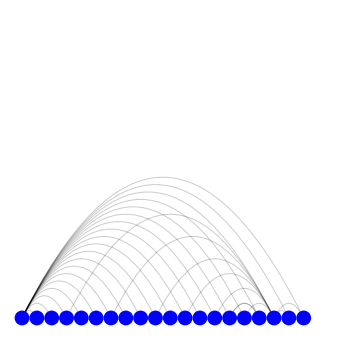

In [108]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T20)

# Draw a to the screen
a.draw()

# Display the plot
plt.show();

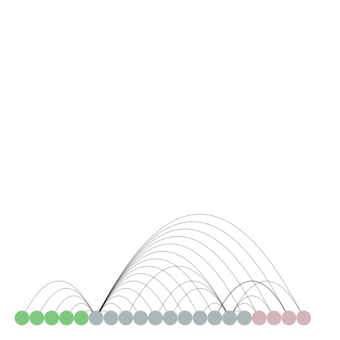

In [107]:
# Create the customized ArcPlot object: a2
a2 = ArcPlot(T20, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show();

Notice the node coloring in the customized `ArcPlot` compared to the uncustomized version. In the customized ArcPlot, the nodes in each of the categories - 'I', 'D', and 'P' - have their own color. If it's difficult to see on your screen, you can expand the plot into a new window by clicking on the pop-out icon on the top-left next to 'Plots'.

## Degree centrality

<img src="images/graphs08.png" alt="" style="width: 400px;"/>

<img src="images/graphs09.png" alt="" style="width: 400px;"/>

<img src="images/graphs10.png" alt="" style="width: 400px;"/>


## Compute number of neighbors for each node

How do you evaluate whether a node is an important one or not? There are a few ways to do so, and here, you're going to look at one metric: `the number of neighbors that a node has`.

Every NetworkX graph `G` exposes a `.neighbors(n)` method that returns a list of nodes that are the neighbors of the node `n`. To begin, use this method in the IPython Shell on the Twitter network T to get the neighbors of of node 1. This will get you familiar with how the function works. Then, your job in this exercise is to write a function that returns all nodes that have m neighbors.

In [120]:
print(list(T100.neighbors(1)))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [123]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T100, 6)
print(six_nbrs)

{64}


## Compute degree distribution

`The number of neighbors that a node has` is called its **"degree"**, and it's possible to compute the **degree distribution across the entire graph**. In this exercise, your job is to compute the degree distribution across T.

In [124]:
# Compute the degree of every node: degrees
degrees = [len(list(T100.neighbors(n))) for n in T100.nodes()]

# Print the degrees
print(degrees)

[47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 15, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 9, 0, 0, 1, 7, 0, 3, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 6, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 15, 4, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0]


## Degree centrality distribution

The **degree of a node** is the number of neighbors that it has. The **degree centrality** is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

The `nx.degree_centrality(G)` function returns a dictionary, where the keys are the nodes and the values are their degree centrality values.

The degree distribution degrees you computed in the previous exercise using the list comprehension has been pre-loaded.

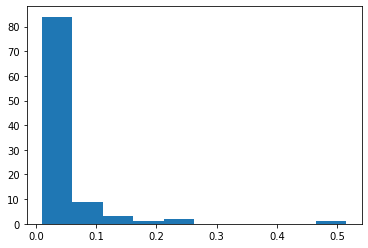

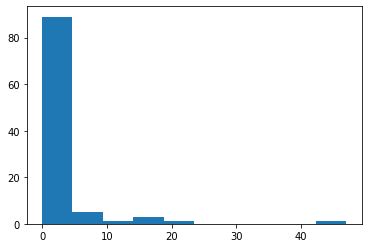

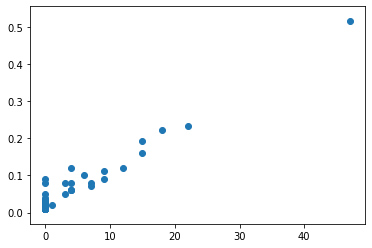

In [126]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T100)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show();

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show();

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show();

Given the similarities of their histograms, it should not surprise you to see a perfect correlation between the centrality distribution and the degree distribution.

## Graph Algorithms

<img src="images/graphs11.png" alt="" style="width: 400px;"/>

<img src="images/graphs12.png" alt="" style="width: 400px;"/>


## Shortest Path I

You can leverage what you know about finding neighbors to try finding paths in a network. One algorithm for path-finding between two nodes is the **"breadth-first search" (BFS)** algorithm. In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

Pathfinding algorithms are important because they provide another way of assessing node importance; you'll see this in a later exercise.

In this set of 3 exercises, you're going to build up slowly to get to the final **BFS** algorithm. The problem has been broken into 3 parts that, if you complete in succession, will get you to a first pass implementation of the **BFS** algorithm.

In [127]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of nodes to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

In the next exercise, you'll extend this function by including the condition where the destination node is not present in the neighbors.

## Shortest Path II

Now that you've got the code for checking whether the destination node is present in neighbors, next up, you're going to extend the same function to write the code for the condition where the destination node is not present in the neighbors.

All the code you need to write is in the else condition; that is, if node2 is not in neighbors.

- Using the `.add()` method, add the current node node to the set visited_nodes to keep track of what nodes have already been visited.
- Add the neighbors of the current node node that have not yet been visited to queue. To do this, you'll need to use the `.extend()` method of queue together with a list comprehension. The `.extend()` method appends all the items in a given list.
- The output expression and iterator variable of the list comprehension are both n. The iterable is the list neighbors, and the conditional is if n is not in the visited nodes.

In [128]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
          
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

To complete the function, you have to write code for the condition in which there is no path between two nodes.

## Shortest Path III

This is the final exercise of this trio! You're now going to complete the problem by writing the code that returns False if there's no path between two nodes.

- Check to see if the queue has been emptied. You can do this by inspecting the last element of queue with `[-1]`.
- Place the appropriate return statement for indicating whether there's a path between these two nodes.

In [129]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

## Betweeness Centrality

<img src="images/graphs13.png" alt="" style="width: 400px;"/>

<img src="images/graphs14.png" alt="" style="width: 400px;"/>


## NetworkX betweenness centrality on a social network

**Betweenness centrality** `is a node importance metric` that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

NetworkX provides the `nx.betweenness_centrality(G)` function for computing the betweenness centrality of every node in a graph, and it returns a dictionary where the keys are the nodes and the values are their betweenness centrality measures.

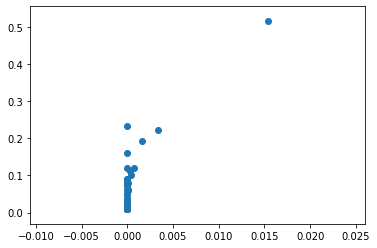

In [131]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T100)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T100)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show();

Now that you know how to compute different metrics for node importance, you're going to take a deep dive into the Twitter network.

## Deep dive - Twitter network

You're going to now take a deep dive into a Twitter network, which will help reinforce what you've learned earlier. First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.

NetworkX has been pre-imported for you as nx.

- Write a function `find_nodes_with_highest_deg_cent(G)` that returns the node(s) with the highest **degree centrality** using the following steps:
    - Compute the degree centrality of G.
    - Compute the maximum degree centrality using the `max()` function on `list(deg_cent.values())`.
    - Iterate over the degree centrality dictionary, `deg_cent.items()`.
    - If the degree centrality value v of the current node k is equal to max_dc, add it to the set of nodes.
- Use your function to find the node(s) that has the highest degree centrality in T.
- Write an assertion statement that checks that the node(s) is/are correctly identified.

In [132]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
        
        # k - node
        # v - centrality value

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T100)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T100)[node] == max(nx.degree_centrality(T100).values())

{1}


## Deep dive - Twitter network part II

Next, you're going to do an analogous deep dive on **betweenness centrality**! Just a few hints to help you along: remember that betweenness centrality is computed using `nx.betweenness_centrality(G)`.

- Write a function `find_node_with_highest_bet_cent(G)` that returns the node(s) with the highest **betweenness centrality**.
    - Compute the betweenness centrality of G.
    - Compute the maximum betweenness centrality using the `max()` function on `list(bet_cent.values())`.
    - Iterate over the degree centrality dictionary, `bet_cent.items()`.
    - If the degree centrality value v of the current node k is equal to max_bc, add it to the set of nodes.
- Use your function to find the node(s) that has the highest betweenness centrality in T.
- Write an assertion statement that you've got the right node.

In [134]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T100)
print(top_bc)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T100)[node] == max(nx.betweenness_centrality(T100).values())

{1}


## Cliques and Communities

<img src="images/graphs15.png" alt="" style="width: 400px;"/>

<img src="images/graphs16.png" alt="" style="width: 400px;"/>


## Identifying triangle relationships

Now that you've learned about **cliques**, it's time to try leveraging what you know to `find structures in a network`. **Triangles** are what you'll go for first. We may be interested in **triangles** because `they're the simplest complex clique`. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In the Twitter network, each node has an 'occupation' label associated with it, in which the Twitter user's work occupation is divided into celebrity, politician and scientist. One potential application of triangle-finding algorithms is to `find out whether users that have similar occupations are more likely to be in a clique with one another`.

- Write a function `is_in_triangle()` that has two parameters - G and n - and checks whether a given node is in a triangle relationship or not.
- `combinations(iterable, n)` returns combinations of size n from iterable. This will be useful here, as you want combinations of size `2` from `G.neighbors(n)`.
- To check whether an edge exists between two nodes, use the `.has_edge(node1, node2)` method. If an edge exists, then the given node is in a triangle relationship, and you should return True.

In [135]:
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

You're going to modify this function in the next exercise to extract all nodes involved in a triangle relationship with a given node.

## Finding nodes involved in triangles

`NetworkX` provides an API for counting the number of triangles that every node is involved in: `nx.triangles(G)`. It returns a dictionary of nodes as the keys and number of triangles as the values. Your job in this exercise is to modify the function defined earlier to extract all of the nodes involved in a triangle relationship with a given node.

In [143]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(T100, 1)) == 23

## Finding open triangles

Let us now move on to `finding open triangles`! Recall that they form the **basis of friend recommendation systems**; `if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C"`.

In [144]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

In [146]:
# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T100.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T100, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

16


## Finding all maximal cliques of size "n"

<img src="images/graphs17.png" alt="" style="width: 400px;"/>

<img src="images/graphs18.png" alt="" style="width: 400px;"/>

<img src="images/graphs19.png" alt="" style="width: 400px;"/>

<img src="images/graphs20.png" alt="" style="width: 400px;"/>

Now that you've explored triangles (and open triangles), let's move on to the concept of **maximal cliques**. **Maximal cliques** `are cliques that cannot be extended by adding an adjacent edge`, and are a useful property of the graph `when finding communities`. NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph: `nx.find_cliques(G)`. Play around with the function by using it on T in the IPython Shell, and then try answering the exercise.

In [147]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

In [156]:
T100b = T100.to_undirected()

In [159]:
# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T100b, 3)) == 42

In [158]:
len(maximal_cliques(T100b, 3))

42

## Subgraphs

<img src="images/graphs21.png" alt="" style="width: 400px;"/>


## Subgraphs I

There may be times when you just want to `analyze a subset of nodes in a network`. To do so, you can copy them out into another graph object using `G.subgraph(nodes)`, which returns a new graph object (of the same type as the original graph) that is comprised of the iterable of nodes that was passed in.

In [160]:
nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/ksatola/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


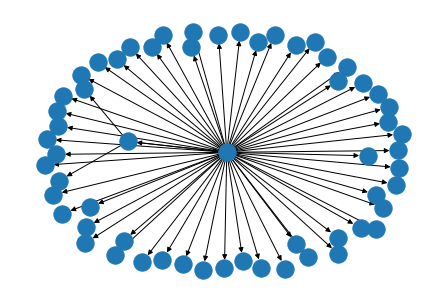

In [161]:
# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show();

## Subgraphs II

In the previous exercise, we gave you a list of nodes whose neighbors we asked you to extract.

Let's try one more exercise in which you `extract nodes that have a particular metadata property and their neighbors`. This should hark back to what you've learned about using list comprehensions to find nodes. The exercise will also build your capacity to compose functions that you've already written before.

- Using a list comprehension, extract nodes that have the metadata 'occupation' as 'celebrity' alongside their neighbors:
    - The output expression of the list comprehension is n, and there are two iterator variables: n and d. The iterable is the list of nodes of T (including the metadata, which you can specify using `data=True`) and the conditional expression is if the 'occupation' key of the metadata dictionary d equals 'celebrity'.
- Place them in a new subgraph called `T_sub`. To do this:
    - Iterate over the nodes, compute the neighbors of each node, and add them to the set of nodes nodeset by using the `.union()` method.
    - Use nodeset along with the `T.subgraph()` method to calculate T_sub.
- Draw T_sub to the screen.

In [ ]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)
    
# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show();